**Loading the dataset**

In [1]:
# Load and clean both BSE and LSE sheets
import pandas as pd

file_path = "C:\\Users\\MI\\Desktop\\DESKTOP\\SEM 2\\ECON 7055 Projects for Data Analytics\\Bloomberg new.xlsx"

# 1. Loaduing  all sheets
sheets = pd.read_excel(file_path, sheet_name=None)
cleaned = {}

for name, df in sheets.items():
    df = df.copy()
    print('Cleaning sheet ' + name)
    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # Sort chronologically
    df = df.sort_values('Date').reset_index(drop=True)
    # Convert numeric columns
    numeric_cols = [col for col in df.columns if col != 'Date']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    # Drop exact duplicates
    dup_count = df.duplicated().sum()
    if dup_count:
        df = df.drop_duplicates()
    print('Post-clean head:')
    print(df.head())
    print('Missing per column:')
    print(df.isna().sum())
    print('---')
    cleaned[name] = df

# Expose cleaned dict for further use
cleaned_dataframes = cleaned
print('done cleaning both sheets')

Cleaning sheet BSE
Post-clean head:
                 Date     Open     High      Low    Close  \
0 2025-01-28 11:30:00  1236.60  1236.60  1236.60  1236.60   
1 2025-01-28 11:40:00  1235.55  1236.25  1228.75  1230.90   
2 2025-01-28 11:50:00  1230.65  1231.10  1222.80  1223.70   
3 2025-01-28 12:00:00  1224.10  1225.10  1221.75  1222.55   
4 2025-01-28 12:10:00  1222.00  1222.60  1220.00  1222.00   

   SMAVG (5)  on Close  SMAVG (10)  on Close  SMAVG (15)  on Close  Volume  \
0                  NaN                   NaN                   NaN    2676   
1                  NaN                   NaN                   NaN   11457   
2                  NaN                   NaN                   NaN   24693   
3                  NaN                   NaN                   NaN    9384   
4              1227.15                   NaN                   NaN    8335   

   SMAVG (5)  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4    11309.0  
Missing per column:
Date              

**Data Engineering**

Head of engineered features for BSE
                 Date    Close  log_return  Volume  vol_change_pct
0 2025-01-28 11:30:00  1236.60         NaN    2676             NaN
1 2025-01-28 11:40:00  1230.90   -0.004620   11457        3.281390
2 2025-01-28 11:50:00  1223.70   -0.005867   24693        1.155276
3 2025-01-28 12:00:00  1222.55   -0.000940    9384       -0.619973
4 2025-01-28 12:10:00  1222.00   -0.000450    8335       -0.111786
5 2025-01-28 12:20:00  1224.90    0.002370   27161        2.258668
6 2025-01-28 12:30:00  1221.00   -0.003189   14545       -0.464490
---
Head of engineered features for LSE
                 Date  Close  log_return  Volume  vol_change_pct
0 2025-01-27 16:00:00   56.9         NaN   19937             NaN
1 2025-01-27 16:10:00   57.0    0.001756    1045       -0.947585
2 2025-01-27 16:20:00   56.9   -0.001756      30       -0.971292
3 2025-01-27 16:30:00   57.1    0.003509    1435       46.833333
4 2025-01-27 16:40:00   57.1    0.000000    5189        2.61602

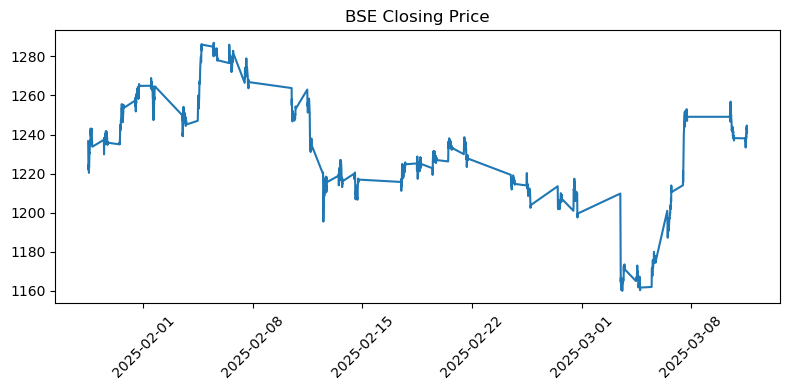

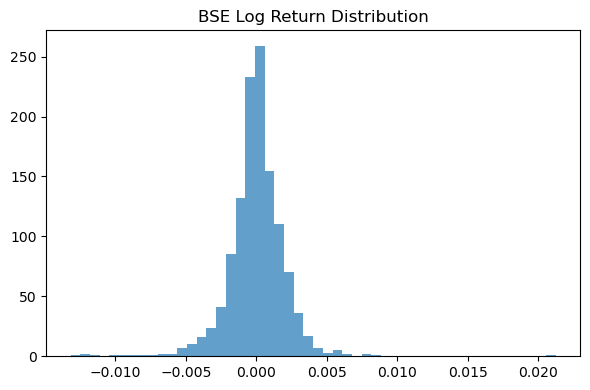

done feature engineering


In [14]:
# My next step: Feature engineering - compute log returns and volume changes for both sheets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use cleaned_dataframes from prior cleaning
bse = cleaned_dataframes['BSE'].copy()
lse = cleaned_dataframes['LSE'].copy()

for name, df in [('BSE', bse), ('LSE', lse)]:
    # Compute log price returns
    df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
    # Compute volume changes (%)
    df['vol_change_pct'] = df['Volume'].pct_change()
    # Store back
    if name == 'BSE':
        bse = df
    else:
        lse = df
    # Print head of new features
    print('Head of engineered features for ' + name)
    print(df[['Date', 'Close', 'log_return', 'Volume', 'vol_change_pct']].head(7))
    print('---')

# lets now go to Plot closing price and log_return for BSE
plt.figure(figsize=(8,4))
plt.plot(bse['Date'], bse['Close'], label='BSE Close')
plt.title('BSE Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot log returns histogram for BSE
plt.figure(figsize=(6,4))
plt.hist(bse['log_return'].dropna(), bins=50, alpha=0.7)
plt.title('BSE Log Return Distribution')
plt.tight_layout()
plt.show()

# Save cleaned and feature-engineered frames
cleaned_dataframes['BSE_features'] = bse
cleaned_dataframes['LSE_features'] = lse

print('done feature engineering')

Head of LSE features:
                 Date  Close  log_return  Volume  vol_change_pct
0 2025-01-27 16:00:00   56.9         NaN   19937             NaN
1 2025-01-27 16:10:00   57.0    0.001756    1045       -0.947585
2 2025-01-27 16:20:00   56.9   -0.001756      30       -0.971292
3 2025-01-27 16:30:00   57.1    0.003509    1435       46.833333
4 2025-01-27 16:40:00   57.1    0.000000    5189        2.616028


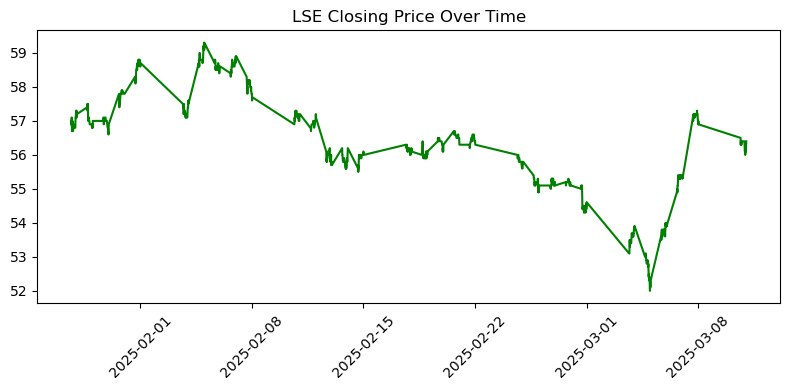

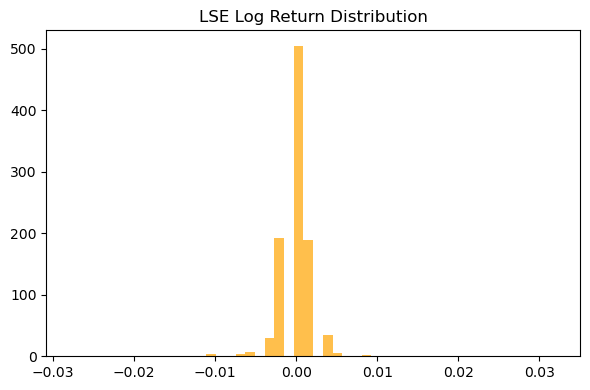

done LSE plots


In [3]:
# Plotting and tables for LSE 
import matplotlib.pyplot as plt
from pandas import to_datetime
from scipy.stats import norm

# Use lse feature dataframe
lse = cleaned_dataframes['LSE_features']

# Display head of LSE features
print('Head of LSE features:')
print(lse[['Date', 'Close', 'log_return', 'Volume', 'vol_change_pct']].head())

# Plot LSE closing price over time
target = lse.copy()
plt.figure(figsize=(8,4))
plt.plot(target['Date'], target['Close'], color='green', label='LSE Close')
plt.title('LSE Closing Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot histogram of LSE log returns
plt.figure(figsize=(6,4))
plt.hist(target['log_return'].dropna(), bins=50, alpha=0.7, color='orange')
plt.title('LSE Log Return Distribution')
plt.tight_layout()
plt.show()

print('done LSE plots')

**Microstructure Analysis**

In [15]:

import numpy as np
import pandas as pd

# Function to calculate Roll's spread
# Based on Cov(ΔP_t, ΔP_{t-1})
def rolls_spread(prices):
    # Calculate price changes
    dP = prices.diff().dropna()
    # Align lagged series
    dP_lag = dP.shift(1).dropna()
    common_index = dP.index.intersection(dP_lag.index)
    # Compute covariance
    cov = dP.loc[common_index].cov(dP_lag.loc[common_index])
    # If covariance is negative, compute spread, else return NaN
    if cov < 0:
        return 2 * np.sqrt(-cov)
    return np.nan

# Compute for BSE and LSE
results = []
for name in ['BSE', 'LSE']:
    spread = rolls_spread(cleaned_dataframes[name]['Close'])
    results.append({'Exchange': name, 'Roll_Spread': spread})

spread_df = pd.DataFrame(results)
# Display the table
print(spread_df)

  Exchange  Roll_Spread
0      BSE          NaN
1      LSE     0.093108


**stp 2: Trade Impact Analysis**

In [16]:
# Step 2: Trade-Impact Analysis - regress ΔP on volume for BSE and LSE
import statsmodels.api as sm
import pandas as pd

results_impact = []
for name in ['BSE', 'LSE']:
    df = cleaned_dataframes[name].copy()
    # price change ΔP
    df['ΔP'] = df['Close'].diff()
    df = df.dropna(subset=['ΔP', 'Volume'])
    # regression
    X = sm.add_constant(df['Volume'])
    model = sm.OLS(df['ΔP'], X).fit()
    beta_vol = model.params['Volume']
    results_impact.append({'Exchange': name, 'Beta': beta_vol, 'R-squared': model.rsquared})

impact_df = pd.DataFrame(results_impact)
print(impact_df)

  Exchange      Beta  R-squared
0      BSE -0.000002   0.000217
1      LSE  0.000001   0.003785


**step 3 : Amihuid**

In [6]:
# Step 3: Liquidity Modelling using Amihud Illiquidity Ratio
import pandas as pd

results_illiq = []
for name in ['BSE', 'LSE']:
    df = cleaned_dataframes[name].copy()
    # price change ΔP
    df['ΔP'] = df['Close'].diff().abs()
    # drop zero volume to avoid division by zero
    df = df[df['Volume'] > 0]
    df['Amihud'] = df['ΔP'] / df['Volume']
    # compute mean illiquidity
    mean_illiq = df['Amihud'].mean()
    results_illiq.append({'Exchange': name, 'Mean_Amihud_Iliquidity': mean_illiq})

illiq_df = pd.DataFrame(results_illiq)
print(illiq_df)

  Exchange  Mean_Amihud_Iliquidity
0      BSE                0.003481
1      LSE                0.000990


In [17]:
# Boxplot visualization for Amihud ratio
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data (reuse illu_df_fixed)
illu_df = illu_df_fixed

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=illu_df, x='Exchange', y='Amihud')
plt.yscale('log')  # log scale to show tail
plt.title('Boxplot of Amihud Illiquidity Ratio (log scale)')
plt.ylabel('Amihud Ratio (log scale)')
plt.tight_layout()
plt.show()
print('done Step 3 boxplot')

NameError: name 'illu_df_fixed' is not defined

**step 4: Spread Autocovariance Analysis - compute autocorrelation of signed price changes**

  Exchange      lag1      lag2      lag3      lag4      lag5
0      BSE  0.010179  0.011062  0.006363  0.015127 -0.021388
1      LSE -0.087511  0.020117 -0.004959 -0.062127  0.013549


<Figure size 800x400 with 0 Axes>

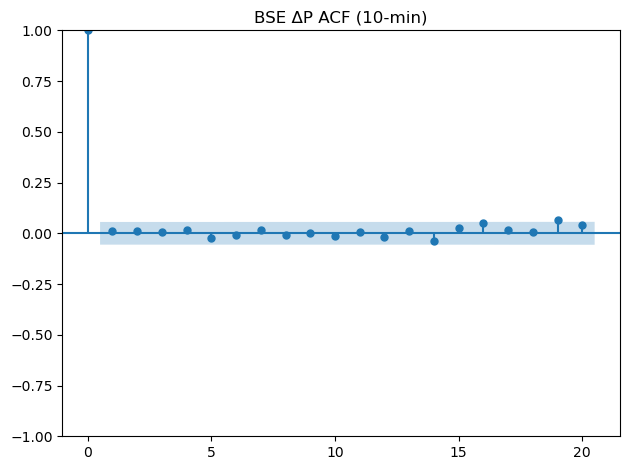

<Figure size 800x400 with 0 Axes>

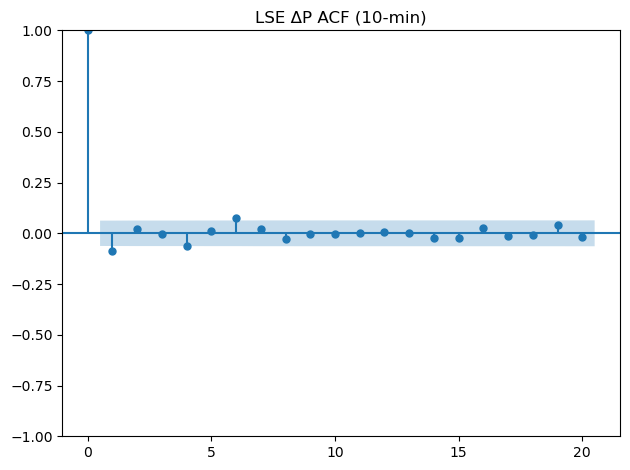

completed Step 4 with fresh data load


In [18]:
# Reload dataframes and perform Step 4 Spread Autocovariance Analysis
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Re-load BSE and LSE data (needed because session variables were lost)
xls = pd.ExcelFile("C:\\Users\\MI\\Desktop\\DESKTOP\\SEM 2\\ECON 7055 Projects for Data Analytics\\Bloomberg new.xlsx")
bse_df = pd.read_excel(xls, 'BSE', parse_dates=['Date'], index_col='Date')
lse_df = pd.read_excel(xls, 'LSE', parse_dates=['Date'], index_col='Date')

# Compute signed 10-min price changes and their autocorrelations
results = []
for name, df in [('BSE', bse_df), ('LSE', lse_df)]:
    df['ΔP'] = df['Close'].diff()
    clean = df['ΔP'].dropna()
    vals = {'Exchange': name}
    for lag in range(1, 6):
        vals['lag' + str(lag)] = clean.autocorr(lag=lag)
    results.append(vals)
autocorr_df = pd.DataFrame(results)
print(autocorr_df)

# Plot ACFs separately for clarity
plt.figure(figsize=(8, 4))
plot_acf(bse_df['ΔP'].dropna(), lags=20, title='BSE ΔP ACF (10-min)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plot_acf(lse_df['ΔP'].dropna(), lags=20, title='LSE ΔP ACF (10-min)')
plt.tight_layout()
plt.show()

print('completed Step 4 with fresh data load')

  Exchange      lag1      lag2      lag3      lag4      lag5
0      BSE  0.010179  0.011062  0.006363  0.015127 -0.021388
1      LSE -0.087511  0.020117 -0.004959 -0.062127  0.013549


<Figure size 800x400 with 0 Axes>

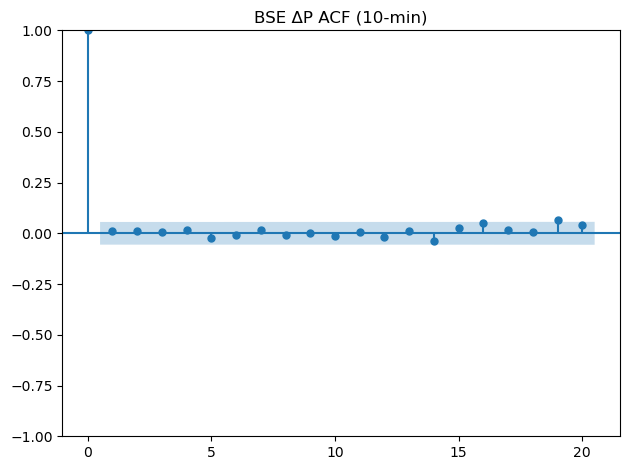

<Figure size 800x400 with 0 Axes>

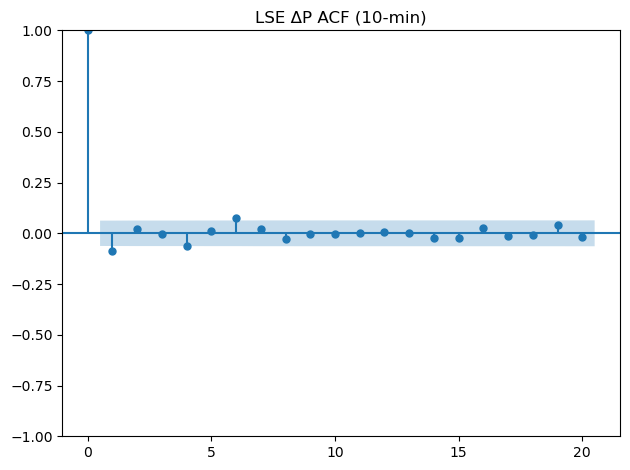

completed Step 4 with fresh data load


In [18]:
# Reload dataframes and perform Step 4 Spread Autocovariance Analysis
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Re-load BSE and LSE data (needed because session variables were lost)
xls = pd.ExcelFile("C:\\Users\\MI\\Desktop\\DESKTOP\\SEM 2\\ECON 7055 Projects for Data Analytics\\Bloomberg new.xlsx")
bse_df = pd.read_excel(xls, 'BSE', parse_dates=['Date'], index_col='Date')
lse_df = pd.read_excel(xls, 'LSE', parse_dates=['Date'], index_col='Date')

# Compute signed 10-min price changes and their autocorrelations
results = []
for name, df in [('BSE', bse_df), ('LSE', lse_df)]:
    df['ΔP'] = df['Close'].diff()
    clean = df['ΔP'].dropna()
    vals = {'Exchange': name}
    for lag in range(1, 6):
        vals['lag' + str(lag)] = clean.autocorr(lag=lag)
    results.append(vals)
autocorr_df = pd.DataFrame(results)
print(autocorr_df)

# Plot ACFs separately for clarity
plt.figure(figsize=(8, 4))
plot_acf(bse_df['ΔP'].dropna(), lags=20, title='BSE ΔP ACF (10-min)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plot_acf(lse_df['ΔP'].dropna(), lags=20, title='LSE ΔP ACF (10-min)')
plt.tight_layout()
plt.show()

print('completed Step 4 with fresh data load')

  Exchange      lag1      lag2      lag3      lag4      lag5
0      BSE  0.010179  0.011062  0.006363  0.015127 -0.021388
1      LSE -0.087511  0.020117 -0.004959 -0.062127  0.013549


<Figure size 800x400 with 0 Axes>

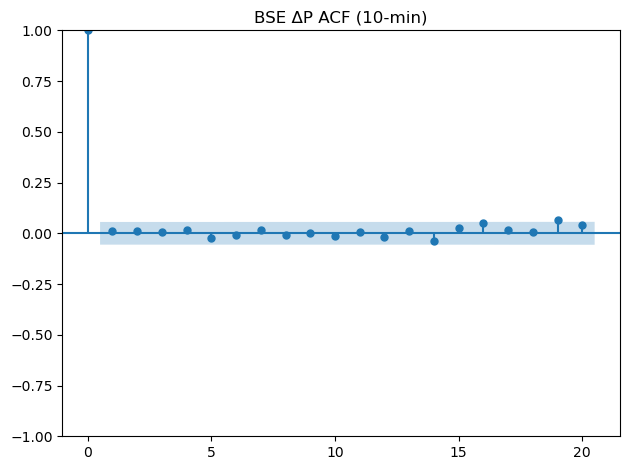

<Figure size 800x400 with 0 Axes>

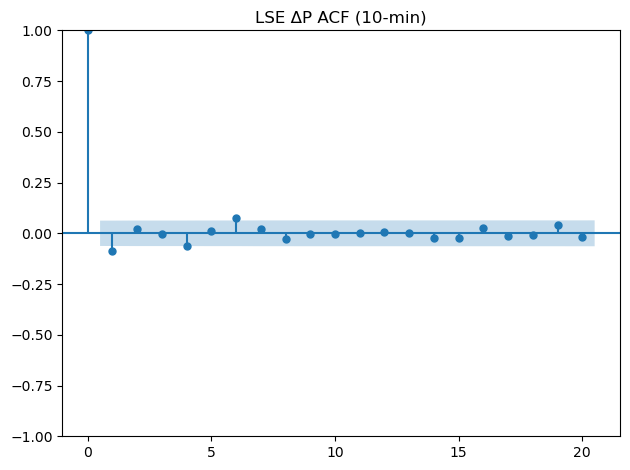

completed Step 4 with fresh data load


In [18]:
# Reload dataframes and perform Step 4 Spread Autocovariance Analysis
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Re-load BSE and LSE data (needed because session variables were lost)
xls = pd.ExcelFile("C:\\Users\\MI\\Desktop\\DESKTOP\\SEM 2\\ECON 7055 Projects for Data Analytics\\Bloomberg new.xlsx")
bse_df = pd.read_excel(xls, 'BSE', parse_dates=['Date'], index_col='Date')
lse_df = pd.read_excel(xls, 'LSE', parse_dates=['Date'], index_col='Date')

# Compute signed 10-min price changes and their autocorrelations
results = []
for name, df in [('BSE', bse_df), ('LSE', lse_df)]:
    df['ΔP'] = df['Close'].diff()
    clean = df['ΔP'].dropna()
    vals = {'Exchange': name}
    for lag in range(1, 6):
        vals['lag' + str(lag)] = clean.autocorr(lag=lag)
    results.append(vals)
autocorr_df = pd.DataFrame(results)
print(autocorr_df)

# Plot ACFs separately for clarity
plt.figure(figsize=(8, 4))
plot_acf(bse_df['ΔP'].dropna(), lags=20, title='BSE ΔP ACF (10-min)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plot_acf(lse_df['ΔP'].dropna(), lags=20, title='LSE ΔP ACF (10-min)')
plt.tight_layout()
plt.show()

print('completed Step 4 with fresh data load')

In [9]:
  
  

# 1) Load data and compute ten-minute log returns for both BSE and LSE  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
  
# Reload the Excel file and parse Date as index  
xls = pd.ExcelFile("C:\\Users\\MI\\Desktop\\DESKTOP\\SEM 2\\ECON 7055 Projects for Data Analytics\\Bloomberg new.xlsx")  
bse_df = pd.read_excel(xls, 'BSE', parse_dates=['Date'], index_col='Date')  
lse_df = pd.read_excel(xls, 'LSE', parse_dates=['Date'], index_col='Date')  
  
# Compute ten-minute log returns  
for df in (bse_df, lse_df):  
    df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))  
  
print('Data loaded and log returns computed for both BSE and LSE.') 

Data loaded and log returns computed for both BSE and LSE.


**step 5 : 5-tick VaR**

First 10 non-missing 5-tick VaR estimates:
                     BSE VaR_5tick  LSE VaR_5tick
Date                                             
2025-03-10 21:30:00            NaN       0.000000
2025-03-10 21:40:00            NaN       0.000000
2025-03-10 21:50:00            NaN       0.000355
2025-03-10 22:00:00            NaN      -0.001427
2025-03-10 22:10:00            NaN      -0.001427
2025-03-10 22:20:00            NaN      -0.001427
2025-03-10 22:50:00            NaN      -0.001427
2025-03-10 23:00:00            NaN      -0.001783
2025-03-10 23:10:00            NaN      -0.001425
2025-03-10 23:40:00            NaN      -0.003198
2025-03-11 11:30:00      -0.003923            NaN
2025-03-11 11:40:00      -0.003923            NaN
2025-03-11 11:50:00      -0.002488            NaN
2025-03-11 12:00:00      -0.002729            NaN
2025-03-11 12:10:00      -0.002729            NaN
2025-03-11 12:20:00      -0.002256            NaN
2025-03-11 12:30:00      -0.002320            NaN
2025-03

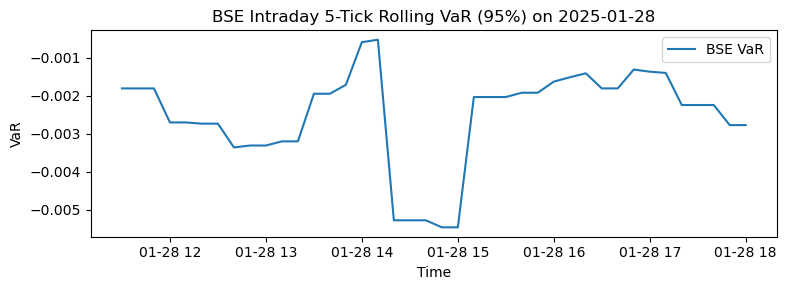

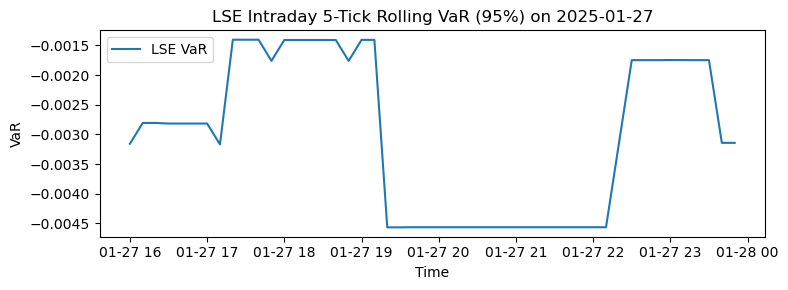

In [10]:

# Combine into a dict for convenience  
dfs = {'BSE': bse_df, 'LSE': lse_df}  
  
# STEP 6: Intraday VaR (5-tick rolling 95% VaR)  
for name, df in dfs.items():  
    df['VaR_5tick'] = df['log_return'].rolling(window=5).quantile(0.05)  
  
# Display the first 10 non-missing VaR values side by side  
print('First 10 non-missing 5-tick VaR estimates:')  
print(pd.DataFrame({  
    'BSE VaR_5tick': bse_df['VaR_5tick'].dropna().head(10),  
    'LSE VaR_5tick': lse_df['VaR_5tick'].dropna().head(10)  
}))  
  
# Plot intraday VaR for the last trading day in each series  
for name, df in dfs.items():  
    sample_date = df.index.date[-1]  
    sample = df[df.index.date == sample_date]  
    plt.figure(figsize=(8,3))  
    plt.plot(sample.index, sample['VaR_5tick'], label=name + ' VaR')  
    plt.title(f'{name} Intraday 5-Tick Rolling VaR (95%) on {sample_date}')  
    plt.xlabel('Time')  
    plt.ylabel('VaR')  
    plt.legend()  
    plt.tight_layout()  
    plt.show()  

**STEP 6 : Maximum Drawdown analysis**


Daily Maximum Drawdown (all days):
                 BSE       LSE
2025-01-27       NaN -0.010517
2025-01-28 -0.018230 -0.006978
2025-01-29 -0.009609 -0.005268
2025-01-30 -0.016427 -0.022616
2025-01-31 -0.011086 -0.017071
2025-02-01 -0.013662 -0.001705
2025-02-03 -0.011979 -0.005237
2025-02-04 -0.030529 -0.030657
2025-02-05 -0.005415 -0.003419
2025-02-06 -0.008506 -0.010216
2025-02-07 -0.009835 -0.006891
2025-02-08       NaN -0.001735
2025-02-10 -0.006152 -0.007002
2025-02-11 -0.005694 -0.005277
2025-02-12 -0.018956 -0.007130
2025-02-13 -0.010621 -0.008937
2025-02-14 -0.008878 -0.010714
2025-02-15       NaN  0.000000
2025-02-17 -0.011976 -0.001787
2025-02-18 -0.009058 -0.007102
2025-02-19 -0.009919 -0.008870
2025-02-20 -0.009591 -0.010616
2025-02-21 -0.007034 -0.007080
2025-02-22       NaN  0.000000
2025-02-24 -0.005956 -0.001791
2025-02-25 -0.005208 -0.003633
2025-02-26       NaN -0.007256
2025-02-27 -0.006788 -0.003623
2025-02-28 -0.013494 -0.005516
2025-03-01       NaN -0.001833
202

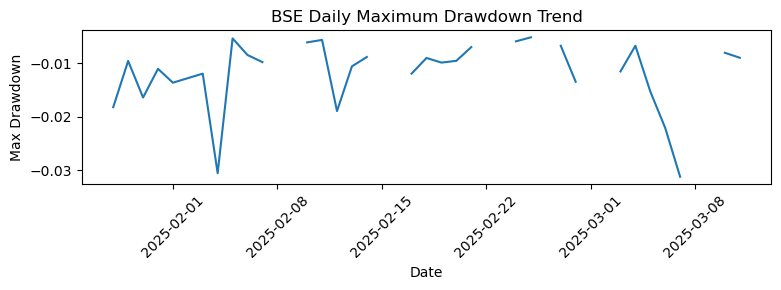

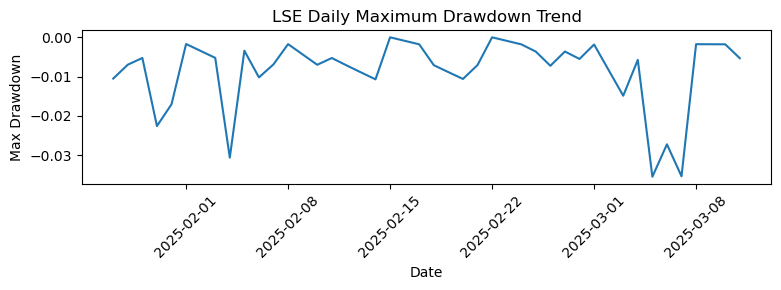

Completed Steps 6 for both BSE and LSE.


In [19]:
max_dd = {}  
for name, df in dfs.items():  
    # Compute cumulative returns resetting each day  
    df['cum_ret'] = (1 + df['log_return'].fillna(0)).cumprod()  
    def daily_dd(group):  
        peak = group.cum_ret.cummax()  
        return ((group.cum_ret - peak) / peak).min()  
    max_dd[name] = df.groupby(df.index.date).apply(daily_dd)  
  
# Combine into a DataFrame and display all days  
max_dd_df = pd.DataFrame(max_dd)  
print('\nDaily Maximum Drawdown (all days):')  
print(max_dd_df)  
  
# Plot the drawdown trend for each exchange  
for name in max_dd_df.columns:  
    plt.figure(figsize=(8,3))  
    plt.plot(max_dd_df.index, max_dd_df[name], label=name + ' Max Drawdown')  
    plt.title(f'{name} Daily Maximum Drawdown Trend')  
    plt.xlabel('Date')  
    plt.ylabel('Max Drawdown')  
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()  
  
print('Completed Steps 6 for both BSE and LSE.')  

ValueError: hour must be in 0..23

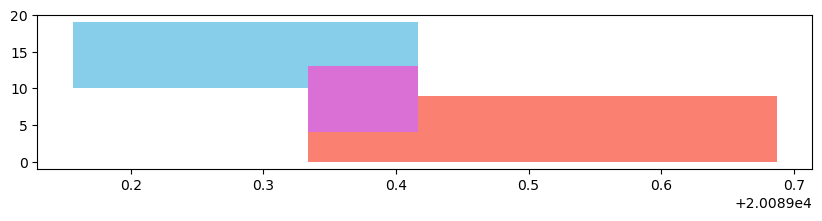

In [12]:
# Plot market trading hours to show overlap for BSE and LSE
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# Define times in UTC for a representative day
day = dt.date(2025,1,1)
# BSE trading hours IST 09:15-15:30 -> UTC 03:45-10:00
bse_open = dt.datetime.combine(day, dt.time(3,45))
bse_close = dt.datetime.combine(day, dt.time(10,0))
# LSE trading hours GMT 08:00-16:30 -> UTC 08:00-16:30
lse_open = dt.datetime.combine(day, dt.time(8,0))
lse_close = dt.datetime.combine(day, dt.time(16,30))

fig, ax = plt.subplots(figsize=(10, 2))
# Plot BSE
ax.broken_barh([(mdates.date2num(bse_open), (mdates.date2num(bse_close)-mdates.date2num(bse_open)) )], (10, 9), facecolors='skyblue', label='BSE')
# Plot LSE
ax.broken_barh([(mdates.date2num(lse_open), (mdates.date2num(lse_close)-mdates.date2num(lse_open)) )], (0, 9), facecolors='salmon', label='LSE')
# Highlight overlap
overlap_start = max(bse_open, lse_open)
overlap_end = min(bse_close, lse_close)
ax.broken_barh([(mdates.date2num(overlap_start), (mdates.date2num(overlap_end)-mdates.date2num(overlap_start)))], (4, 9), facecolors='orchid', label='Overlap')

# Format
ax.set_ylim(-1, 20)
ax.set_xlim(mdates.date2num(dt.datetime.combine(day, dt.time(0,0))), mdates.date2num(dt.datetime.combine(day, dt.time(24,0))))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_yticks([4.5, 10.5])
ax.set_yticklabels(['Overlap', 'BSE'])
ax.set_yticks([0.5], minor=True)
ax.set_yticklabels(['LSE'], minor=True)
ax.legend(loc='upper right')
ax.set_title('Market Trading Hours and Overlap (UTC)')
plt.tight_layout()
plt.savefig('market_overlap_diagram.png')
plt.show()
print('done with market overlap diagram')

**Step 8 : Arch and Garch Model**

Sample of cleaned daily log-returns (UTC):
                                BSE       LSE
Date                                         
2025-01-29 00:00:00+00:00  0.001620 -0.001762
2025-01-30 00:00:00+00:00  0.014301  0.019215
2025-01-31 00:00:00+00:00  0.008776  0.015451
2025-02-03 00:00:00+00:00 -0.015539 -0.022395
2025-02-04 00:00:00+00:00  0.032281  0.029187
Fitting GARCH(1,1) for BSE
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    BSE   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.034
Vol Model:                      GARCH   Log-Likelihood:               -48.4478
Distribution:                  Normal   AIC:                           102.896
Method:            Maximum Likelihood   BIC:                           106.997
                                        No. Observations:                   29
Date:                Sun, May 11 2025   Df Residuals:  

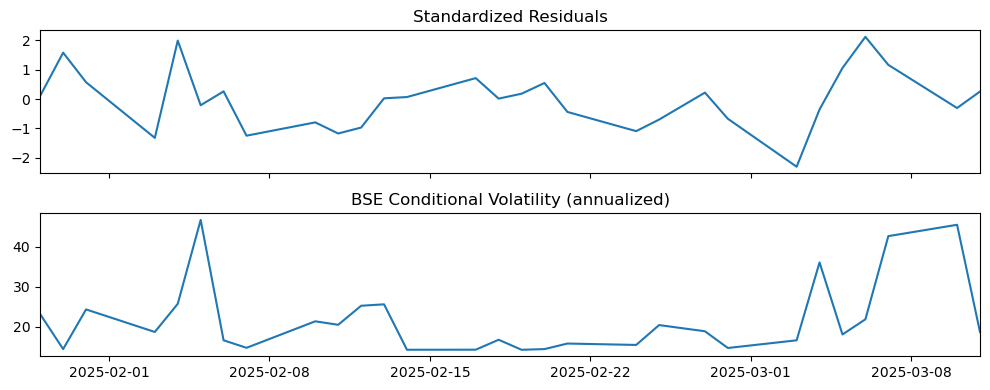

Saved plot to bse_garch_vol.png
Fitting GARCH(1,1) for LSE
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    LSE   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.034
Vol Model:                      GARCH   Log-Likelihood:               -52.0987
Distribution:                  Normal   AIC:                           110.197
Method:            Maximum Likelihood   BIC:                           114.299
                                        No. Observations:                   29
Date:                Sun, May 11 2025   Df Residuals:                       29
Time:                        12:46:25   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      

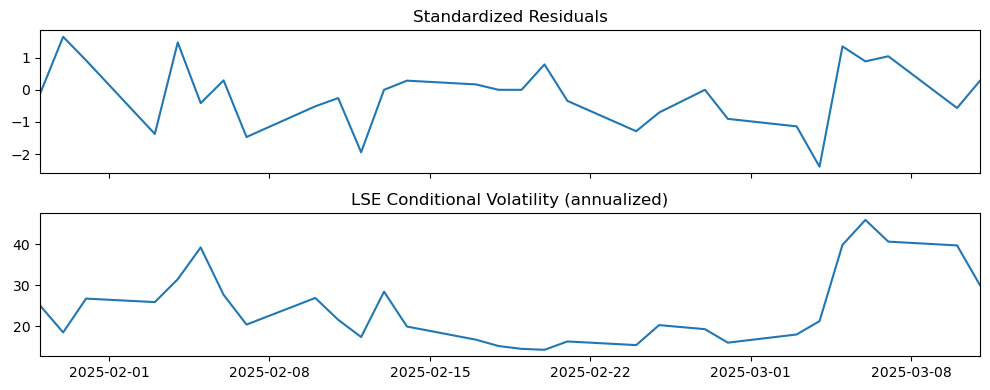

Saved plot to lse_garch_vol.png
Completed GARCH modeling on clean UTC data


In [13]:
# Load and prepare clean UTC daily log-returns, then fit GARCH(1,1) models
# 1. Load corrected data in UTC
def load_and_prepare():
    import pandas as pd
    import numpy as np
    # Read Excel sheets
    xls = pd.ExcelFile("C:\\Users\\MI\\Desktop\\DESKTOP\\SEM 2\\ECON 7055 Projects for Data Analytics\\Bloomberg new.xlsx")
    bse = pd.read_excel(xls, 'BSE', parse_dates=['Date'])
    lse = pd.read_excel(xls, 'LSE', parse_dates=['Date'])
    # Ensure UTC timezone
    bse['Date'] = bse['Date'].dt.tz_localize('UTC')
    lse['Date'] = lse['Date'].dt.tz_localize('UTC')
    # Set index
    bse = bse.set_index('Date')
    lse = lse.set_index('Date')
    # Combine closes
    df = pd.concat([bse['Close'].rename('BSE'), lse['Close'].rename('LSE')], axis=1)
    # Keep only valid UTC-aligned business days
    daily = df.resample('B').last().dropna()
    # Compute daily log-returns
    returns = np.log(daily / daily.shift(1)).dropna()
    print('Sample of cleaned daily log-returns (UTC):')
    print(returns.head())
    return returns

returns = load_and_prepare()

# 2. Fit GARCH(1,1) to both series
from arch import arch_model
import matplotlib.pyplot as plt

for venue in ['BSE', 'LSE']:
    series = returns[venue] * 100  # percent returns
    print('Fitting GARCH(1,1) for ' + venue)
    model = arch_model(series, mean='Zero', vol='Garch', p=1, q=1, dist='normal')
    res = model.fit(disp='off')
    # Summary
    print(res.summary())
    # Plot conditional volatility
    fig = res.plot(annualize='D')
    fig.set_size_inches(10, 4)
    plt.title(venue + ' Conditional Volatility (annualized)')
    plt.tight_layout()
    filename = venue.lower() + '_garch_vol.png'
    plt.savefig(filename)
    plt.show()
    print('Saved plot to ' + filename)

print('Completed GARCH modeling on clean UTC data')